In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import ot
import cvxpy as cp
import seaborn as sns
import twp_utils as twp

# Supplementary Packages
#import scipy.stats as stats
#import scipy.special as sps
#import time as t

## Mixed Multivariate Normal

In [2]:
def mixed_multi_gauss(mean1, mean2, mean3, cov1, cov2, cov3, samplesize, partition1, partition2):
    
    size1 = int(samplesize * partition1)
    size2 = int(samplesize * partition2)
    size3 = int(samplesize - size1 - size2)
    
    gauss1 = np.random.multivariate_normal(mean = mean1, cov = cov1, size = size1)
    gauss2 = np.random.multivariate_normal(mean = mean2, cov = cov2, size = size2)
    gauss3 = np.random.multivariate_normal(mean = mean3, cov = cov3, size = size3)
    
    mixed = np.concatenate((gauss1, gauss2, gauss3), axis = 0)
    np.random.shuffle(mixed)
    
    return(mixed)

In [3]:
np.random.seed(31)

dim = 10
obs = 1000

mu1 = [10]*dim
mu2 = [50]*dim
mu3 = [200]*dim
mu4 = [-50]*dim
mu5 = [-100]*dim

covmat = np.full((dim, dim), 0.5)
np.fill_diagonal(covmat, 1)


X1 = np.random.multivariate_normal(mean = mu1, cov = covmat, size = obs)
X2 = np.random.multivariate_normal(mean = mu2, cov = covmat, size = obs)
X3 = np.random.multivariate_normal(mean = mu3, cov = covmat, size = obs)
X4 = np.random.multivariate_normal(mean = mu4, cov = covmat, size = obs)


Y1 = mixed_multi_gauss(mu1, mu2, mu3, covmat, covmat, covmat, obs, 0.3, 0.6)
Y2 = mixed_multi_gauss(mu1, mu2, mu3, covmat, covmat, covmat, obs, 0.8, 0.1)
Y3 = mixed_multi_gauss(mu2, mu3, mu4, covmat, covmat, covmat, obs, 0.2, 0.7)
Y4 = mixed_multi_gauss(mu1, mu3, mu4, covmat, covmat, covmat, obs, 0.2, 0.2)

## X

In [4]:
weightsX, projectionX = twp.tan_wass_proj(X1, [X2, X3, X4])
weightsX

array([0.35563541, 0.09790178, 0.5464628 ])

In [5]:
meansX = pd.concat((pd.DataFrame(X1).describe().iloc[1,:], 
           pd.DataFrame(projectionX).describe().iloc[1,:]), axis = 1).transpose()
meansX

,0,1,2,3,4,5,6,7,8,9
mean,10.092219,9.978631,10.045170,9.980574,10.070721,10.014731,10.081365,10.056725,10.034983,9.997672
mean,10.012259,10.046199,10.053189,10.027557,10.048977,10.018092,10.052721,10.028997,10.028189,10.040848


<AxesSubplot:ylabel='Count'>

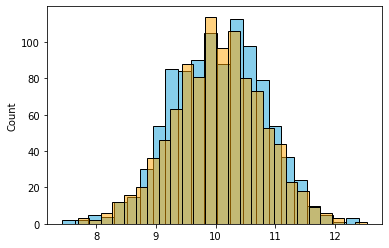

In [6]:
sns.histplot(np.mean(X1, axis = 1), color = 'skyblue', alpha = 1)
sns.histplot(np.mean(projectionX, axis = 1), color = 'orange', alpha = 0.5)

# Y

In [7]:
weightsY, projectionY = twp.tan_wass_proj(Y1, [Y2, Y3, Y4])
weightsY

array([ 8.20138560e-01,  1.79861440e-01, -1.56233928e-16])

In [8]:
meansY = pd.concat((pd.DataFrame(Y1).describe().iloc[1,:], 
           pd.DataFrame(projectionY).describe().iloc[1,:]), axis = 1).transpose()
meansY

,0,1,2,3,4,5,6,7,8,9
mean,53.019178,53.067153,52.999586,52.993341,53.004658,52.991371,52.963285,53.029207,53.010614,53.016582
mean,53.132332,53.151176,53.162170,53.155804,53.119507,53.148273,53.126339,53.114342,53.145329,53.111309


<AxesSubplot:ylabel='Count'>

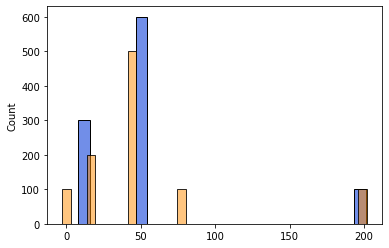

In [9]:
sns.histplot(np.mean(Y1, axis = 1), color = 'royalblue')
sns.histplot(np.mean(projectionY, axis = 1), color = 'darkorange', alpha = 0.5)